In [1]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt

import pysiaf
import miricoord.imager.mirim_tools as mt

In [2]:
siaf=pysiaf.Siaf('MIRI')
print('SIAF version: ',pysiaf.JWST_PRD_VERSION)
print('miricoord version: ',mt.version())

SIAF version:  PRDOPSSOC-039
miricoord version:  cdp7


In [3]:
# Output file in Ideal coordinates
outfile = 'MiriCoronDithers.txt'

## Convert 4QPM LFLAT ##

In [4]:
infile = '1043-MIRI-056-4QM-LFLAT-dedicatedscanpattern.txt' # input file in pixel offsets

In [5]:
# Read in desired offsets in pixels
data=ascii.read(infile)
number,dx,dy=data['Nr'].data,data['Xpix'].data,data['Ypix'].data
number=number+1 # PRD likes to be 1-indexed

In [6]:
# Define reference aperture that we'll use to construct the Ideal coordinates
aper='MIRIM_CORON1065'
# Bounding Box of real aperture
xbound1065=[siaf[aper].XIdlVert1,siaf[aper].XIdlVert2,siaf[aper].XIdlVert3,siaf[aper].XIdlVert4,siaf[aper].XIdlVert1]
ybound1065=[siaf[aper].YIdlVert1,siaf[aper].YIdlVert2,siaf[aper].YIdlVert3,siaf[aper].YIdlVert4,siaf[aper].YIdlVert1]
# Get the detector coordinates of this aperture's reference point (origin of Ideal frame)
xcen,ycen=siaf[aper].XDetRef,siaf[aper].YDetRef # 1-indexed
# Convert desired pixel offsets to pixel values
x,y=xcen+dx,ycen+dy
# Convert to v2, v3 (inputs need to be 0-indexed, so subtract 1)
v2,v3=mt.xytov2v3(x-1,y-1,'F770W')
# Convert to Ideal
xi1065,yi1065=mt.v2v3toIdeal(v2,v3,aper)

aper='MIRIM_CORON1140'
# Bounding Box of real aperture
xbound1140=[siaf[aper].XIdlVert1,siaf[aper].XIdlVert2,siaf[aper].XIdlVert3,siaf[aper].XIdlVert4,siaf[aper].XIdlVert1]
ybound1140=[siaf[aper].YIdlVert1,siaf[aper].YIdlVert2,siaf[aper].YIdlVert3,siaf[aper].YIdlVert4,siaf[aper].YIdlVert1]
# Get the detector coordinates of this aperture's reference point (origin of Ideal frame)
xcen,ycen=siaf[aper].XDetRef,siaf[aper].YDetRef # 1-indexed
# Convert desired pixel offsets to pixel values
x,y=xcen+dx,ycen+dy
# Convert to v2, v3 (inputs need to be 0-indexed, so subtract 1)
v2,v3=mt.xytov2v3(x-1,y-1,'F770W')
# Convert to Ideal
xi1140,yi1140=mt.v2v3toIdeal(v2,v3,aper)

aper='MIRIM_CORON1550'
# Bounding Box of real aperture
xbound1550=[siaf[aper].XIdlVert1,siaf[aper].XIdlVert2,siaf[aper].XIdlVert3,siaf[aper].XIdlVert4,siaf[aper].XIdlVert1]
ybound1550=[siaf[aper].YIdlVert1,siaf[aper].YIdlVert2,siaf[aper].YIdlVert3,siaf[aper].YIdlVert4,siaf[aper].YIdlVert1]
# Get the detector coordinates of this aperture's reference point (origin of Ideal frame)
xcen,ycen=siaf[aper].XDetRef,siaf[aper].YDetRef # 1-indexed
# Convert desired pixel offsets to pixel values
x,y=xcen+dx,ycen+dy
# Convert to v2, v3 (inputs need to be 0-indexed, so subtract 1)
v2,v3=mt.xytov2v3(x-1,y-1,'F770W')
# Convert to Ideal
xi1550,yi1550=mt.v2v3toIdeal(v2,v3,aper)

SIAF version:  PRDOPSSOC-039
SIAF version:  PRDOPSSOC-039
SIAF version:  PRDOPSSOC-039


In [7]:
# Print results to output file

print("",file=open(outfile,"w"))
print("LFLAT_CORON1065",file=open(outfile,"a"))
for ii in range(0,len(xi1065)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xi1065[ii],yi1065[ii]),file=open(outfile,"a"))
    
print("",file=open(outfile,"a"))
print("LFLAT_CORON1140",file=open(outfile,"a"))
for ii in range(0,len(xi1140)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xi1140[ii],yi1140[ii]),file=open(outfile,"a"))
    
print("",file=open(outfile,"a"))
print("LFLAT_CORON1550",file=open(outfile,"a"))
for ii in range(0,len(xi1550)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xi1550[ii],yi1550[ii]),file=open(outfile,"a"))

Text(0, 0.5, 'YIdeal (arcsec)')

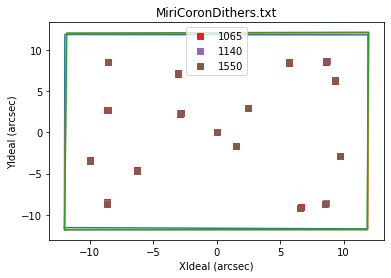

In [8]:
# Plot results
plt.plot(xbound1065,ybound1065)
plt.plot(xbound1140,ybound1140)
plt.plot(xbound1550,ybound1550)

plt.plot(xi1065,yi1065,'s',label='1065')
plt.plot(xi1140,yi1140,'s',label='1140')
plt.plot(xi1550,yi1550,'s',label='1550')
plt.legend()
plt.title(outfile)
plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

## Convert Lyot LFLAT ##

In [9]:
infile = '1043-MIRI-056-LYOT-LFLAT-dedicatedscanpattern.txt' # input file in pixel offsets

In [10]:
# Read in desired offsets in pixels
data=ascii.read(infile)
num,dx,dy=data['Nr'].data,data['Xpix'].data,data['Ypix'].data
num=num+1 # PRD likes to be 1-indexed

In [11]:
# Define reference aperture that we'll use to construct the Ideal coordinates
aper='MIRIM_CORONLYOT'
# Bounding Box of real aperture
xboundlyot=[siaf[aper].XIdlVert1,siaf[aper].XIdlVert2,siaf[aper].XIdlVert3,siaf[aper].XIdlVert4,siaf[aper].XIdlVert1]
yboundlyot=[siaf[aper].YIdlVert1,siaf[aper].YIdlVert2,siaf[aper].YIdlVert3,siaf[aper].YIdlVert4,siaf[aper].YIdlVert1]
# Get the detector coordinates of this aperture's reference point (origin of Ideal frame)
xcen,ycen=siaf[aper].XDetRef,siaf[aper].YDetRef # 1-indexed
# Convert desired pixel offsets to pixel values
x,y=xcen+dx,ycen+dy
# Convert to v2, v3 (inputs need to be 0-indexed, so subtract 1)
v2,v3=mt.xytov2v3(x-1,y-1,'F770W')
# Convert to Ideal
xilyot,yilyot=mt.v2v3toIdeal(v2,v3,aper)

SIAF version:  PRDOPSSOC-039


In [12]:
# Print results to a file
print("",file=open(outfile,"a"))
print("LFLAT_CORONLYOT",file=open(outfile,"a"))
for ii in range(0,len(xilyot)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xilyot[ii],yilyot[ii]),file=open(outfile,"a"))

Text(0, 0.5, 'YIdeal (arcsec)')

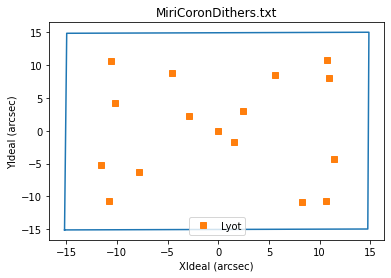

In [13]:
# Plot results
plt.plot(xboundlyot,yboundlyot)
plt.plot(xilyot,yilyot,'s',label='Lyot')
plt.legend()
plt.title(outfile)
plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

## Convert 4QPM PFLAT ##

In [14]:
infile = '1043-MIRI-056-4QM-PFLAT-dedicatedscanpattern.txt' # input file in pixel offsets

In [15]:
# Read in desired offsets in pixels
data=ascii.read(infile)
num,dx,dy=data['Nr'].data,data['Xpix'].data,data['Ypix'].data
num=num+1 # PRD likes to be 1-indexed

In [16]:
# Define reference aperture that we'll use to construct the Ideal coordinates
aper='MIRIM_CORON1065'
# Bounding Box of real aperture
xbound1065=[siaf[aper].XIdlVert1,siaf[aper].XIdlVert2,siaf[aper].XIdlVert3,siaf[aper].XIdlVert4,siaf[aper].XIdlVert1]
ybound1065=[siaf[aper].YIdlVert1,siaf[aper].YIdlVert2,siaf[aper].YIdlVert3,siaf[aper].YIdlVert4,siaf[aper].YIdlVert1]
# Get the detector coordinates of this aperture's reference point (origin of Ideal frame)
xcen,ycen=siaf[aper].XDetRef,siaf[aper].YDetRef # 1-indexed
# Convert desired pixel offsets to pixel values
x,y=xcen+dx,ycen+dy
# Convert to v2, v3 (inputs need to be 0-indexed, so subtract 1)
v2,v3=mt.xytov2v3(x-1,y-1,'F770W')
# Convert to Ideal
xi1065,yi1065=mt.v2v3toIdeal(v2,v3,aper)

aper='MIRIM_CORON1140'
# Bounding Box of real aperture
xbound1140=[siaf[aper].XIdlVert1,siaf[aper].XIdlVert2,siaf[aper].XIdlVert3,siaf[aper].XIdlVert4,siaf[aper].XIdlVert1]
ybound1140=[siaf[aper].YIdlVert1,siaf[aper].YIdlVert2,siaf[aper].YIdlVert3,siaf[aper].YIdlVert4,siaf[aper].YIdlVert1]
# Get the detector coordinates of this aperture's reference point (origin of Ideal frame)
xcen,ycen=siaf[aper].XDetRef,siaf[aper].YDetRef # 1-indexed
# Convert desired pixel offsets to pixel values
x,y=xcen+dx,ycen+dy
# Convert to v2, v3 (inputs need to be 0-indexed, so subtract 1)
v2,v3=mt.xytov2v3(x-1,y-1,'F770W')
# Convert to Ideal
xi1140,yi1140=mt.v2v3toIdeal(v2,v3,aper)

aper='MIRIM_CORON1550'
# Bounding Box of real aperture
xbound1550=[siaf[aper].XIdlVert1,siaf[aper].XIdlVert2,siaf[aper].XIdlVert3,siaf[aper].XIdlVert4,siaf[aper].XIdlVert1]
ybound1550=[siaf[aper].YIdlVert1,siaf[aper].YIdlVert2,siaf[aper].YIdlVert3,siaf[aper].YIdlVert4,siaf[aper].YIdlVert1]
# Get the detector coordinates of this aperture's reference point (origin of Ideal frame)
xcen,ycen=siaf[aper].XDetRef,siaf[aper].YDetRef # 1-indexed
# Convert desired pixel offsets to pixel values
x,y=xcen+dx,ycen+dy
# Convert to v2, v3 (inputs need to be 0-indexed, so subtract 1)
v2,v3=mt.xytov2v3(x-1,y-1,'F770W')
# Convert to Ideal
xi1550,yi1550=mt.v2v3toIdeal(v2,v3,aper)

SIAF version:  PRDOPSSOC-039
SIAF version:  PRDOPSSOC-039
SIAF version:  PRDOPSSOC-039


In [17]:
# Print results to output file

print("",file=open(outfile,"a"))
print("PFLAT_CORON1065",file=open(outfile,"a"))
for ii in range(0,len(xi1065)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xi1065[ii],yi1065[ii]),file=open(outfile,"a"))
    
print("",file=open(outfile,"a"))
print("PFLAT_CORON1140",file=open(outfile,"a"))
for ii in range(0,len(xi1140)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xi1140[ii],yi1140[ii]),file=open(outfile,"a"))
    
print("",file=open(outfile,"a"))
print("PFLAT_CORON1550",file=open(outfile,"a"))
for ii in range(0,len(xi1550)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xi1550[ii],yi1550[ii]),file=open(outfile,"a"))

Text(0, 0.5, 'YIdeal (arcsec)')

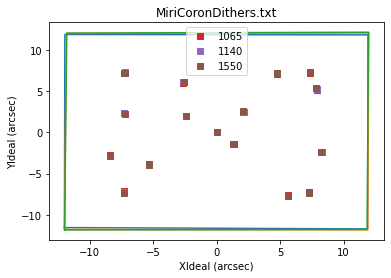

In [18]:
# Plot results
plt.plot(xbound1065,ybound1065)
plt.plot(xbound1140,ybound1140)
plt.plot(xbound1550,ybound1550)

plt.plot(xi1065,yi1065,'s',label='1065')
plt.plot(xi1140,yi1140,'s',label='1140')
plt.plot(xi1550,yi1550,'s',label='1550')
plt.legend()
plt.title(outfile)
plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')

## Convert Lyot PFLAT ##

In [19]:
infile = '1043-MIRI-056-LYOT-PFLAT-dedicatedscanpattern.txt' # input file in pixel offsets

In [20]:
# Read in desired offsets in pixels
data=ascii.read(infile)
num,dx,dy=data['Nr'].data,data['Xpix'].data,data['Ypix'].data
num=num+1 # PRD likes to be 1-indexed

In [21]:
# Define reference aperture that we'll use to construct the Ideal coordinates
aper='MIRIM_CORONLYOT'
# Bounding Box of real aperture
xboundlyot=[siaf[aper].XIdlVert1,siaf[aper].XIdlVert2,siaf[aper].XIdlVert3,siaf[aper].XIdlVert4,siaf[aper].XIdlVert1]
yboundlyot=[siaf[aper].YIdlVert1,siaf[aper].YIdlVert2,siaf[aper].YIdlVert3,siaf[aper].YIdlVert4,siaf[aper].YIdlVert1]
# Get the detector coordinates of this aperture's reference point (origin of Ideal frame)
xcen,ycen=siaf[aper].XDetRef,siaf[aper].YDetRef # 1-indexed
# Convert desired pixel offsets to pixel values
x,y=xcen+dx,ycen+dy
# Convert to v2, v3 (inputs need to be 0-indexed, so subtract 1)
v2,v3=mt.xytov2v3(x-1,y-1,'F770W')
# Convert to Ideal
xilyot,yilyot=mt.v2v3toIdeal(v2,v3,aper)

SIAF version:  PRDOPSSOC-039


In [22]:
# Print results to a file
print("",file=open(outfile,"a"))
print("PFLAT_CORONLYOT",file=open(outfile,"a"))
for ii in range(0,len(xilyot)):
    print("{0:<3}{1:>10.6f}     {2:>10.6f}".format(number[ii],xilyot[ii],yilyot[ii]),file=open(outfile,"a"))

Text(0, 0.5, 'YIdeal (arcsec)')

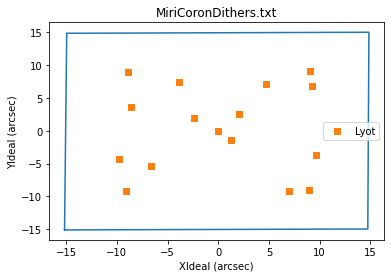

In [23]:
# Plot results
plt.plot(xboundlyot,yboundlyot)
plt.plot(xilyot,yilyot,'s',label='Lyot')
plt.legend()
plt.title(outfile)
plt.xlabel('XIdeal (arcsec)')
plt.ylabel('YIdeal (arcsec)')